# Regression
1. Linear Regression
2. NN
3. KNN
4. SVM
5. ...

# Clustering
1. K-means/Median
2. DBSCAN
    - Radius
    - Min Point
3. Mean Shift
4. Birch
5. Spectral Clustering
5. Affinity Propagation
6. Agglomerative Clustering

Applications: Image Segmentation

Required Libraries

In [12]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [13]:
img = cv2.imread('Statue_of_Liberty.jpg')

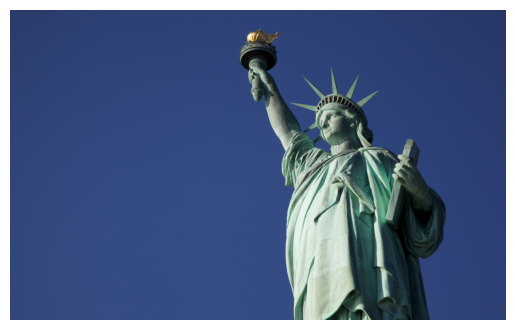

In [14]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
data = []
H, W, C = img.shape
print(H, W, C)

1200 1920 3


In [16]:
for i in range(H):
    for j in range(W):
        data.append(img[i, j, :])

In [17]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(data)
centers = kmeans.cluster_centers_

In [18]:
centers = np.uint8(centers)
segmented_img = centers[labels.flatten()]

In [19]:
segmented_img = centers[labels].astype(np.uint8)
segmented_img = segmented_img.reshape(img.shape)

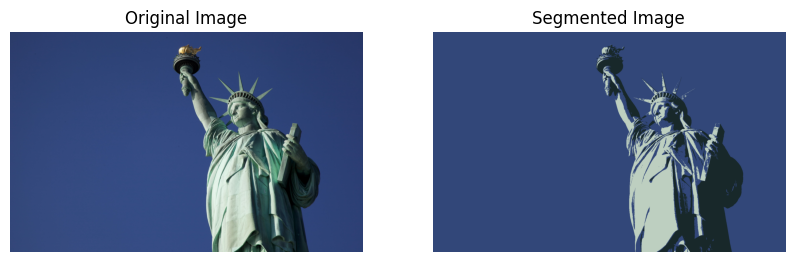

In [20]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title('Segmented Image')
plt.axis('off')

plt.show()

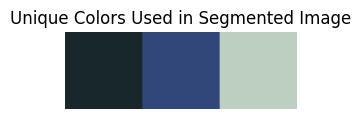

In [24]:
unique_colors = np.unique(segmented_img.reshape(-1, 3), axis=0)
color_bar = np.zeros((50, len(unique_colors) * 50, 3), dtype=np.uint8)
start_x = 0
for i, color in enumerate(unique_colors):
    end_x = start_x + 50
    color_bar[:, start_x:end_x, :] = color
    start_x = end_x
plt.figure(figsize=(10, 1))
plt.imshow(color_bar)
plt.title('Unique Colors Used in Segmented Image')
plt.axis('off')

plt.show()

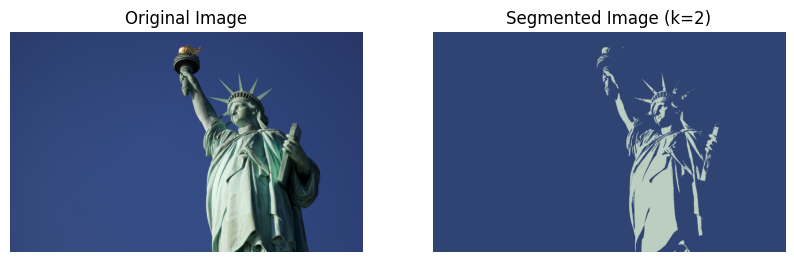

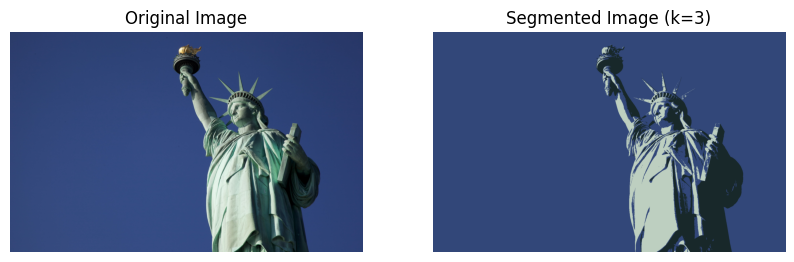

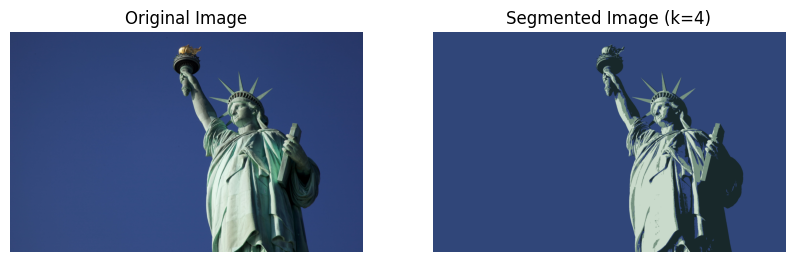

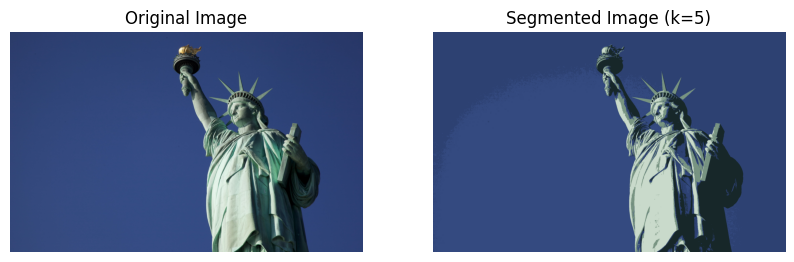

In [26]:
k_values = [2, 3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    centers = kmeans.cluster_centers_

    segmented_img = np.zeros_like(img)

    for i in range(H):
        for j in range(W):
            distances = np.linalg.norm(centers - img[i, j], axis=1)
            segmented_img[i, j] = centers[np.argmin(distances)]

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_img)
    plt.title(f'Segmented Image (k={k})')
    plt.axis('off')

    plt.show()
